# DATA PREPARATION

## Step 1 - Loading the Required Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler, OneHotEncoder, PolynomialFeatures, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, SGDClassifier, Ridge, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_digits
import pickle 

## Step 2 - Reading the Data and performing Basic Data Checks

In [2]:
df = pd.read_csv('data_cleaning_analysis.csv')
print(df.shape)


(21613, 24)


#### Ne garder que les paramètres demandés à l'utilisateur

In [3]:
df = df.drop(['date', 'nb_days', 'year_rate', 'lat', 'long', 'sqft_living15', 'sqft_above', 'sqft_lot15', 'year', 'month', 'day'], axis=1)

In [4]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027


## Step 4 - Creating Arrays for the Features and the Response Variable

### Convertir les variables catégorielles en objets

Ce qui permettra d'appliquer des encodages spécifiques aux catégories de variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_built      21613 non-null  int64  
 11  yr_renovated  21613 non-null  int64  
 12  zipcode       21613 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 2.1 MB


In [6]:
# Conversion zipcode en str
df['zipcode'] = df['zipcode'].astype(str)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         21613 non-null  float64
 1   bedrooms      21613 non-null  int64  
 2   bathrooms     21613 non-null  float64
 3   sqft_living   21613 non-null  int64  
 4   sqft_lot      21613 non-null  int64  
 5   floors        21613 non-null  float64
 6   waterfront    21613 non-null  int64  
 7   view          21613 non-null  int64  
 8   condition     21613 non-null  int64  
 9   grade         21613 non-null  int64  
 10  yr_built      21613 non-null  int64  
 11  yr_renovated  21613 non-null  int64  
 12  zipcode       21613 non-null  object 
dtypes: float64(3), int64(9), object(1)
memory usage: 2.1+ MB


## Step 4 - Creating the Training and Test Datasets  

### Diviser data set en training set et test set

In [8]:
# Séparer la target (i.e. price) des autres valeurs (X)
X = df.drop('price', axis=1)
y = df.price

In [9]:
# Split le dataset en spécifiant le pourcentage de data à garder dans le test dataset, ici 20%
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20)

In [10]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 14997 to 18381
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      17290 non-null  int64  
 1   bathrooms     17290 non-null  float64
 2   sqft_living   17290 non-null  int64  
 3   sqft_lot      17290 non-null  int64  
 4   floors        17290 non-null  float64
 5   waterfront    17290 non-null  int64  
 6   view          17290 non-null  int64  
 7   condition     17290 non-null  int64  
 8   grade         17290 non-null  int64  
 9   yr_built      17290 non-null  int64  
 10  yr_renovated  17290 non-null  int64  
 11  zipcode       17290 non-null  object 
dtypes: float64(2), int64(9), object(1)
memory usage: 1.7+ MB


### Sélection des colonnes à encoder et à standardiser

In [11]:
# Sélection des colonnes numériques
num_col = list(X.select_dtypes(include=[float, int]).columns)

# Sélection des colonnes catégorielles
cat_col = list(X.select_dtypes(include=[object]).columns)

In [12]:
num_col

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'yr_renovated']

In [13]:
cat_col

['zipcode']

## Normalisation, standardisation 

Mettre les valeurs quantitatives sur la même échelle, ce qui facilite l'apprentissage des modèles de Machine Learning

### Encodage de chaque classe de la variable y en une valeur numérique

In [14]:
# Créer une pipeline pour les transformation à faire sur les variables numériques
# Standardisation: Transformer les variables pour qu'elles aient une moyenne égale à 0 et un écart type égal à 1

num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())

# Etablir les encodages à faire respectivement pour les variables catégorielles et numériques
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(), cat_col),
    ("scaling", num_pipe, num_col)
])

## Step 5 - Build, Predict and Evaluate the Regression Model

## REGRESSION SIMPLES

## Linear Regression

In [15]:
# Instantiate the algorithm 
lr = LinearRegression()

# Fits the model on the training set
lr.fit(X_train, y_train)

LinearRegression()

#### Make the predictions

In [16]:
#predicts on the training set
pred_train_lr= lr.predict(X_train)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

#predicts on the training set
pred_test_lr= lr.predict(X_test)

#prints the evaluation metrics - RMSE and R-squared - on the training set
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

217698.3664352463
0.6470055763660985
211865.38027590612
0.6718884048209758


## Ridge Regression

In [17]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))


pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

217698.36646993182
0.6470055762536144
211865.73058007073
0.6718873198022426


## Lasso Regression

In [18]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))


pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

217698.36643528406
0.6470055763659761
211865.39220237464
0.6718883678804175


## ElasticNet Regression

In [19]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))


pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

218480.76058078618
0.6444637377378045
214429.345062626
0.6638988312582528


Les régressions simples montrent un taux de réussite faible, i.e. <= 65%.

## REGRESSION OPTIMISEE

## Création de la pipeline (ou chaîne de transformation)

Avantages:  
1. simple à utiliser  
2. sécurisé (évite d'avoir des fuites de données ou des données mal transformées)  
3. permet de faire des cross-validation

In [20]:
# Création d'une pipeline intégrant le preprocessing et le(s) modèle(s)
model=make_pipeline(preprocessing, LinearRegression(), PolynomialFeatures())

## Linear Regression

In [21]:
# Création modèle
model_lr = make_pipeline(preprocessing, LinearRegression())

# Calcul des variables en fittant le modèle sur les datasets
print(model_lr.fit(X_train, y_train))

# Recherche du score
print(model_lr.score(X_test, y_test))


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'yr_built',
                                  

## Lasso Regression

In [22]:
model_lasso = make_pipeline(preprocessing, Lasso())
print(model_lasso.fit(X_train, y_train))
model_lasso.score(X_test, y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'yr_built',
                                  

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.453e+14, tolerance: 2.321e+11
  model = cd_fast.enet_coordinate_descent(


0.8557616129234358

## ElasticNet Regression

In [23]:
model_enet= make_pipeline(preprocessing, ElasticNet())
print(model_enet.fit(X_train, y_train))
model_enet.score(X_test, y_test)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot', OneHotEncoder(),
                                                  ['zipcode']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'yr_built',
                                  

0.7064539745698972

L'utilisation de pipelines permet de gagner entre 8% à 22% de précision.

## Prédictions

In [24]:
y_pred = model_lasso.predict(X_train)

# Chercher les valeurs atypiques ou aberrantes
residual = (y_train - y_pred).abs().sort_values()

residual

7237     1.091567e+00
2405     7.189869e+00
234      7.255281e+00
5315     8.651538e+00
757      1.623965e+01
             ...     
18482    1.462446e+06
10446    1.484645e+06
9254     1.714404e+06
8638     2.004221e+06
1448     2.070501e+06
Name: price, Length: 17290, dtype: float64

In [25]:
# Recherche des quantiles pour établir le seuil de résidus
residual.quantile(0.99)

522623.7189405351

Il y a 1% des valeurs au-dessus de 525 735$.

In [26]:
# Supprimer les variables aberrantes pour affiner le modèle et gagner en précision

to_drop = residual[residual > residual.quantile(0.99)].index
df_cleaned = df.drop(to_drop)
df_cleaned

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,2009,0,98103
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2014,0,98146
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,2009,0,98144
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,2004,0,98027


/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


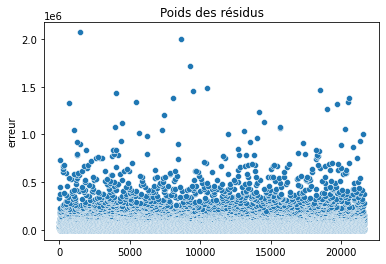

In [27]:
# Visualisation des valeurs aberrantes ou atypiques
sns.scatterplot(residual.index, residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [28]:
# Chercher le poids de résidus spécifiques
df[df.bedrooms == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1947,0,98103


In [29]:
# Poids du résidu spécifique (?)
residual[residual.index == 15870]

15870    18638.153704
Name: price, dtype: float64

In [30]:
# Normaliser à nouveau
X = df.drop('price', axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X,y)
num_col = list(X.select_dtypes(include=[float,int]).columns)
cat_col = list(X.select_dtypes(include=[object]).columns)
my_num_pipe = make_pipeline(StandardScaler(), PolynomialFeatures())
preprocessing = ColumnTransformer([
    ("one_hot", OneHotEncoder(),cat_col),
    ("scaling", num_pipe, num_col)
])

model_lasso.fit(X_train, y_train)
model_lasso.score(X_test, y_test)

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+14, tolerance: 2.113e+11
  model = cd_fast.enet_coordinate_descent(


0.8576133926284746

Baisse de performance

In [31]:
# # Trouver les meilleurs paramètres de la pipeline
# model_autre = make_pipeline(PolynomialFeatures(), StandardScaler())
# params = {
#     'polynomialfeatures__degree' : [2]
# }

# grid = GridSearchCV(model_autre, param_grid=params, cv=4)
# grid.fit(X_train, y_train)
# grid.best_params_
# grid.score(X_test, y_test)

## Courbes d'apprentissage

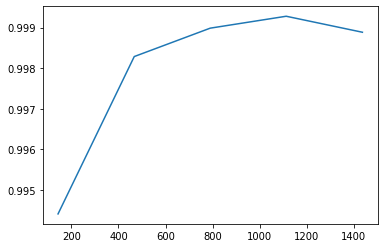

In [32]:
#Avec l'estimator

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=5,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

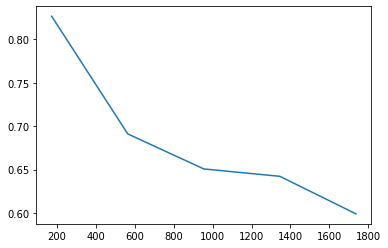

In [33]:
# Avec Ridge Regression (rr)

X, y = load_digits(return_X_y=True)
estimator = SVC(gamma=0.001)

train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(rr, X, y, cv=30,return_times=True)

plt.plot(train_sizes,np.mean(train_scores,axis=1))

/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.227e+12, tolerance: 1.683e+10
  model = cd_fast.enet_coordinate_descent(
/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+13, tolerance: 4.874e+10
  model = cd_fast.enet_coordinate_descent(
/home/nusbaumer/miniconda3/envs/nnp/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

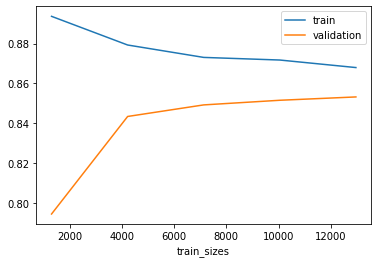

In [34]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(model_lasso,X_train,y_train,return_times=True)
                                           
                                           
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, test_scores.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

A partir de 3500 essais, le test set rejoint les performances du train set.

## Résultat

In [35]:
model_lasso.score(X_test, y_test)*100

85.76133926284746

The performance of the model lasso is summarized below:  
 
    Lasso Regression Model: Test set R-square of 85.25 percent.  
    
The ElasticNet Regression model is performing the worst. All the other regression models are performing better with a decent R-squared and stable RMSE values.  

## Créer un fichier pickle pour intégrer le modèle au code de l'app

In [36]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_lasso, file)